📁 Archivos montados desde input:
/kaggle/input/prueba/DNI_chatgtp.png
/kaggle/input/prueba/DNIfictiohombre.mp4
/kaggle/input/xception5o/tensorflow2/default/1/xception_deepfake_image_5o.h5


2025-06-14 12:32:00.047324: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



✅ Modelo cargado: /kaggle/input/xception5o/tensorflow2/default/1/xception_deepfake_image_5o.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


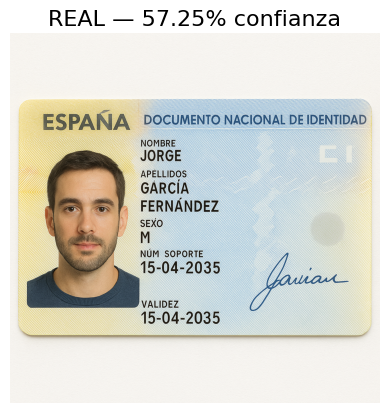

In [2]:
# ✅ DEPENDENCIAS
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input

# ✅ MOSTRAR ARCHIVOS DISPONIBLES
print("📁 Archivos montados desde input:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# ✅ CARGAR MODELO (ajusta nombre según el que veas arriba)
model_path = "/kaggle/input/xception5o/tensorflow2/default/1/xception_deepfake_image_5o.h5"  # Cambia si tu archivo tiene otro nombre
model = load_model(model_path)
print(f"\n✅ Modelo cargado: {model_path}")

# ✅ CARGAR IMAGEN (puedes usar una imagen que subas en "Add data")
image_path = "/kaggle/input/prueba.png"  # Reemplaza con tu ruta real
img = cv2.imread(image_path)

if img is None:
    raise ValueError(f"❌ No se pudo cargar la imagen desde: {image_path}")

# ✅ PREPROCESAMIENTO
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(rgb, (299, 299))
x = preprocess_input(resized.astype(np.float32))
x = np.expand_dims(x, 0)

# ✅ PREDICCIÓN
pred = model.predict(x)[0][0]
label = "REAL" if pred < 0.5 else "FAKE"
confidence = (1 - pred) if label == "REAL" else pred

# ✅ VISUALIZAR RESULTADO
plt.imshow(rgb)
plt.axis('off')
plt.title(f"{label} — {confidence:.2%} confianza", fontsize=16)
plt.show()
